# Section B. Prediction Uncertainty with Bootstrapping
## Question 3: Bootstrapping

In [1]:
library(reshape2)
library(ggplot2)
library(corrplot)
# Load data: 
train <- read.csv('Task1B_train.csv')
test <- read.csv('Task1B_test.csv')

corrplot 0.84 loaded


In [2]:
# dimension of train and test set
dim(train)
dim(test)

[1] 930   5

[1] 930   5

In [3]:
index = 1:930
train.data <- train[index,-5] # grab all columns, leave out the species (last column)
train.label <- train[index,5]
test.data <- test[index,-5] # grab all columns, leave out the species (last column)
test.label <- test[index,5]

dim(train.data) # 930 records
dim(test.data) # 930 records

[1] 930   4

[1] 930   4

### Question 3 (I)
bootstrapping for KNN regression

In [4]:
######################################## bootstrap function ##############################################
# function that generates sample indixes based on bootstrap technique
bootstrap <- function (original.size, size, sets){
    #matrix to store indexes of new data sets 
    index <- matrix(nrow=sets, ncol=size)
    
    #iteration on number of sets to be generated
    for (t in 1:sets){
        #generating index for new data set
        index[t, ] <- sample(x=original.size, size=size, replace = TRUE)
    }
    return(index)
}


### Question 3 (II)
bootstrapping for KNN regression with times = 50 (the number of subsets), size = 20 (the size of each subset), and change K=1,.., 15 (the neighbourhood size).

In [5]:
######################################## KNN function ####################################################
knn <- function(train.data, train.label, test.data, K){
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len)]
    for (i in 1:test.len){
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        test.label[i]<- (mean(train.label[nn]))
    }
    return (test.label)
}


########################## Calculating average error by knn on each dataset of bootstrapping ##########################

K <- 15           # Maximum K for KNN 
set <- 50           # number of datasets
size <- 20          # size of datasets

# generate bootstrap indices:
boot.index <- bootstrap(nrow(train.data), size, set)

# a dataframe to track the mean squared error in each case
mse <- data.frame('K'=1:K, 'Datasets'=1:set, 'error'=rep(0,set*K))


## for every k values:
for (k in 1: K){
    
    ### for every dataset generated of size 20:
    for (l in 1:set){
        
        #### calculate iteration index i
        i <- (k-1)*set+l
        
        #### save sample indices that were selected by bootstrap
        index <- boot.index[l,]
        
        #### save the value of k and l
        mse[i,'K'] <- k
        mse[i,'Times'] <- l
        
        #### calculate and record the average train and test error
        mse[i,'error'] <-  mean((knn(train.data[index, ], train.label[index], test.data, K=k) - test.label)^2)
    } 
}

Boxplot whith K on the x-axis, and the y-axis is the average error corresponding to each K.

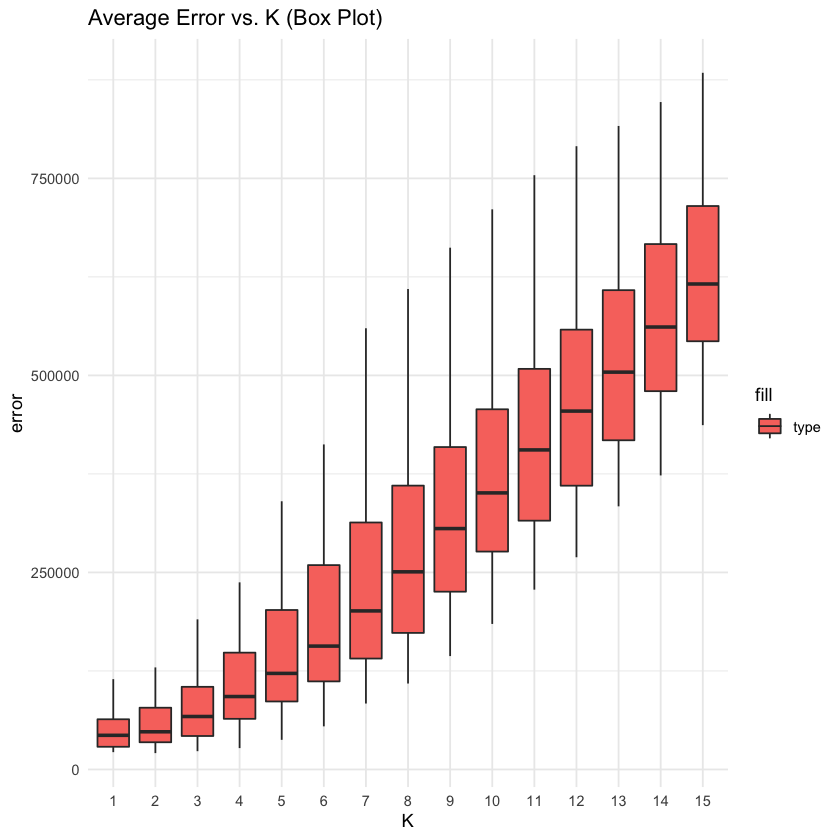

In [6]:
mse$K <- as.factor(mse$K)
ggplot(mse, aes(x=K, y=error,,fill = 'type')) + geom_boxplot(outlier.shape=NA) +  ggtitle('Average Error vs. K (Box Plot)') + theme_minimal()
# # ignore the warnings (because of ignoring outliers)
# options(warn=-1)


### Question 3: (III)
As 𝐾 increases,the mean error of each box plot goes higher for each k indicating that the test error increases with increase in k.
As 𝐾 increases,the size of the boxplot increases shows that the range becomes wider increasing test error uncertainty.

### Question 3: (IV)
bootstrapping for KNN regression with K= 5(the neighbourhood size), times = 50 (the number of subsets), and change sizes = 5, 10, 15,..., 75 (the size of each subset).

In [7]:
K <- 5           # Maximum K for KNN 
set <- 50           # number of datasets
size <- seq(5,75,5)          # size of datasets


# a dataframe to track the number of missclassified samples in each case
mse1 <- data.frame('Dataset'=1:set, 'Size' =  size, 'error'=rep(0,set*length(size)))

## for every size values from 5 to 75: iteraion will be 1:15
flag = 0
for (s in size){
    
    flag = flag + 1
    # generate bootstrap indices for dataset of sizes s (5,10,....75:)
    boot.index <- bootstrap(nrow(train.data), s, set)
    
    ### for every dataset of sizes s:
    for (l in 1:set){
        
        #### calculate iteration index i
        i <- (flag-1)*set+l
        
        #### save sample indices that were selected by bootstrap
        index <- boot.index[l,]
        
        #### save the value of size and number of dataset
        mse1[i,'Size'] <- s
        mse1[i,'Dataset'] <- l
        
        #### calculate and record the average train and test error
        mse1[i,'error'] <-  mean((knn(train.data[index, ], train.label[index], test.data, K) - test.label)^2)
    } 
}

boxplot with ‘sizes’ on x-axis and the y-axis is the average error  corresponding to each value of ‘times’.

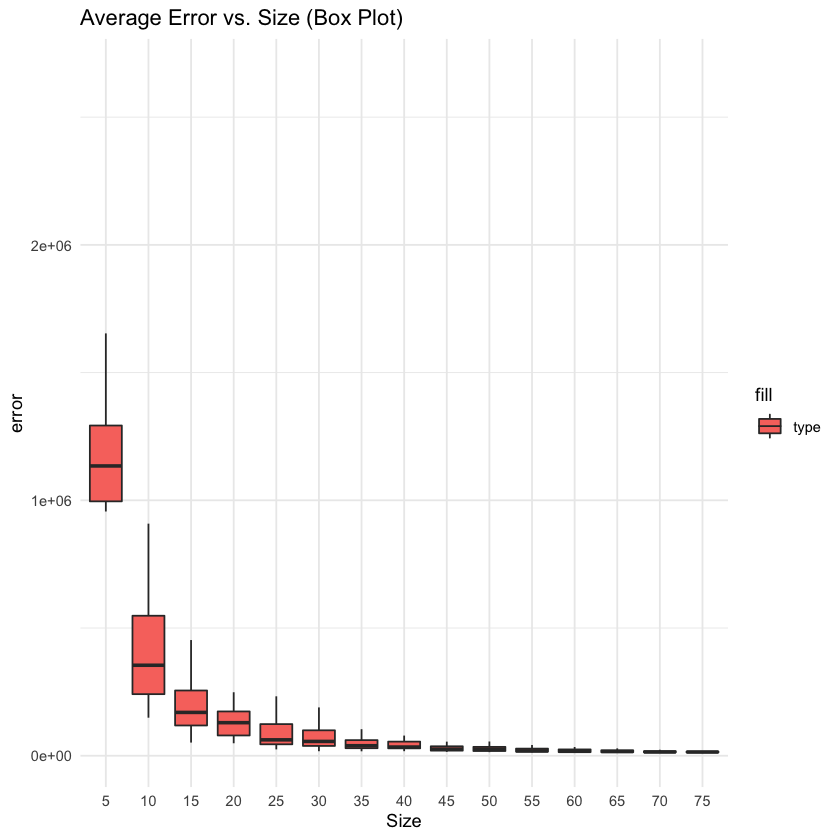

In [8]:
mse1$Size <- as.factor(mse1$Size)
ggplot(mse1, aes(x=Size, y=error,fill = 'type')) + geom_boxplot(outlier.shape=NA)  +ggtitle('Average Error vs. Size (Box Plot)') + theme_minimal()

### Question 3: (V)
From the plot above, we can conclude that as the size of the training data increases, the size of boxplot decreases, so the uncertainity decreases.therefore As the size increases, error decreases along with its uncertainity.